In [70]:
import pandas as pd
df=pd.read_csv("train.csv")

In [71]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [73]:
#no missing values

In [74]:
df.duplicated().sum()

0

In [75]:
df["churn"].value_counts(normalize=True)

churn
no     0.859294
yes    0.140706
Name: proportion, dtype: float64

In [76]:
cat_cols=df.select_dtypes(include="O").columns

In [77]:
for i in cat_cols:
   print(len(df[i].unique()))
   print(df[i].unique())
   
   print("------------------------")

51
['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
------------------------
3
['area_code_415' 'area_code_408' 'area_code_510']
------------------------
2
['no' 'yes']
------------------------
2
['yes' 'no']
------------------------
2
['no' 'yes']
------------------------


In [78]:
df=pd.get_dummies(df,columns=['state', 'area_code', 'international_plan', 'voice_mail_plan'],drop_first=True,dtype=int)

In [79]:
df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,0,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,1,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,1,0,1,0
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,...,0,0,0,0,0,0,0,1,0,1


In [80]:
df["churn"]=df["churn"].replace({"yes":1,"no":0})

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   number_vmail_messages          4250 non-null   int64  
 2   total_day_minutes              4250 non-null   float64
 3   total_day_calls                4250 non-null   int64  
 4   total_day_charge               4250 non-null   float64
 5   total_eve_minutes              4250 non-null   float64
 6   total_eve_calls                4250 non-null   int64  
 7   total_eve_charge               4250 non-null   float64
 8   total_night_minutes            4250 non-null   float64
 9   total_night_calls              4250 non-null   int64  
 10  total_night_charge             4250 non-null   float64
 11  total_intl_minutes             4250 non-null   float64
 12  total_intl_calls               4250 non-null   i

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [83]:
X=df.drop("churn",axis=1)
Y=df["churn"]

In [84]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123,stratify=Y)

In [85]:
X_train_scaled=StandardScaler().fit_transform(X_train)
X_test_scaled=StandardScaler().fit_transform(X_test)

In [87]:
X.shape

(4250, 69)

In [88]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [89]:
model=Sequential()
model.add(Dense(3,activation="sigmoid",input_dim=X.shape[1]))
model.add(Dense(1,activation="sigmoid"))


In [90]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 210       
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 214 (856.00 Byte)
Trainable params: 214 (856.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
model.compile(loss="binary_crossentropy",optimizer="Adam")

In [95]:
model.fit(X_train_scaled,Y_train,epochs=100)

Epoch 1/100

107/107 [==============================] - 1s 1ms/step - loss: 0.6775
Epoch 2/100
107/107 [==============================] - 0s 989us/step - loss: 0.5901
Epoch 3/100
107/107 [==============================] - 0s 1ms/step - loss: 0.5254
Epoch 4/100
107/107 [==============================] - 0s 1ms/step - loss: 0.4758
Epoch 5/100
107/107 [==============================] - 0s 1ms/step - loss: 0.4383
Epoch 6/100
107/107 [==============================] - 0s 1ms/step - loss: 0.4101
Epoch 7/100
107/107 [==============================] - 0s 1ms/step - loss: 0.3889
Epoch 8/100
107/107 [==============================] - 0s 1ms/step - loss: 0.3734
Epoch 9/100
107/107 [==============================] - 0s 1ms/step - loss: 0.3616
Epoch 10/100
107/107 [==============================] - 0s 2ms/step - loss: 0.3525
Epoch 11/100
107/107 [==============================] - 0s 2ms/step - loss: 0.3455
Epoch 12/100
107/107 [==============================] - 0s 2ms/step - loss: 0.3397
Epoch 13/1

107/107 [==============================] - 0s 1ms/step - loss: 0.2822
Epoch 98/100
107/107 [==============================] - 0s 1ms/step - loss: 0.2819
Epoch 99/100
107/107 [==============================] - 0s 2ms/step - loss: 0.2816
Epoch 100/100
107/107 [==============================] - 0s 1ms/step - loss: 0.2813


In [96]:
model.layers[0].get_weights()

[array([[-2.57813573e-01,  3.02650928e-02, -5.13847452e-03],
        [ 1.78879768e-01, -5.21464087e-02,  5.01148164e-01],
        [-4.29586768e-01, -9.69232440e-01,  8.76409888e-01],
        [-8.51824358e-02, -3.29682171e-01,  2.84470785e-02],
        [-7.78334796e-01, -5.28470755e-01,  6.71268702e-01],
        [-2.66079307e-01, -1.89504594e-01,  3.87509435e-01],
        [ 1.24138240e-02,  1.67659909e-01,  1.02409020e-01],
        [-1.33106124e-03, -3.72593403e-01,  5.32445133e-01],
        [-6.70550466e-02, -3.18099648e-01,  1.95148870e-01],
        [ 1.02158755e-01,  6.22083604e-01, -1.12029001e-01],
        [-1.34554431e-01, -9.51006338e-02,  3.82872015e-01],
        [-2.69169569e-01,  1.19542249e-01,  2.61752725e-01],
        [ 1.87970325e-01, -2.91131437e-01, -2.80102819e-01],
        [-2.15794384e-01,  1.27394736e-01,  3.64790380e-01],
        [-7.22080231e-01, -1.58985150e+00,  1.80016649e+00],
        [-4.50388230e-02,  5.21946028e-02, -4.01009880e-02],
        [-1.55992523e-01

In [97]:
model.layers[1].get_weights()

[array([[-2.161611 ],
        [-1.9481196],
        [ 1.1718748]], dtype=float32),
 array([-0.42819482], dtype=float32)]

In [108]:
y_log=model.predict(X_test_scaled)

27/27 [==============================] - 0s 1ms/step


In [109]:
import numpy as np
Y_pred=np.where(y_log>0.5,1,0)


In [110]:
Y_pred

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [111]:
from sklearn.metrics import accuracy_score


In [112]:
accuracy_score(Y_test,Y_pred)

0.8623529411764705

In [116]:
model2=Sequential()
model2.add(Dense(3,activation="relu",input_dim=X.shape[1]))
model2.add(Dense(1,activation="sigmoid"))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 210       
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 214 (856.00 Byte)
Trainable params: 214 (856.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [122]:
model2.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [127]:

history=model2.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
85/85 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9353 - val_loss: 0.2721 - val_accuracy: 0.9059
Epoch 2/100
85/85 [==============================] - 0s 2ms/step - loss: 0.1862 - accuracy: 0.9353 - val_loss: 0.2726 - val_accuracy: 0.9044
Epoch 3/100
85/85 [==============================] - 0s 2ms/step - loss: 0.1864 - accuracy: 0.9357 - val_loss: 0.2728 - val_accuracy: 0.9059
Epoch 4/100
85/85 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9349 - val_loss: 0.2720 - val_accuracy: 0.9059
Epoch 5/100
85/85 [==============================] - 0s 2ms/step - loss: 0.1868 - accuracy: 0.9346 - val_loss: 0.2722 - val_accuracy: 0.9074
Epoch 6/100
85/85 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.9349 - val_loss: 0.2731 - val_accuracy: 0.9059
Epoch 7/100
85/85 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9360 - val_loss: 0.2726 - val_accuracy: 0.9074
Epoch 8/100
8

Epoch 59/100
85/85 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9346 - val_loss: 0.2770 - val_accuracy: 0.9059
Epoch 60/100
85/85 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.9357 - val_loss: 0.2764 - val_accuracy: 0.9059
Epoch 61/100
85/85 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.9349 - val_loss: 0.2761 - val_accuracy: 0.9044
Epoch 62/100
85/85 [==============================] - 0s 2ms/step - loss: 0.1850 - accuracy: 0.9338 - val_loss: 0.2768 - val_accuracy: 0.9059
Epoch 63/100
85/85 [==============================] - 0s 2ms/step - loss: 0.1852 - accuracy: 0.9353 - val_loss: 0.2761 - val_accuracy: 0.9044
Epoch 64/100
85/85 [==============================] - 0s 3ms/step - loss: 0.1851 - accuracy: 0.9360 - val_loss: 0.2767 - val_accuracy: 0.9059
Epoch 65/100
85/85 [==============================] - 0s 2ms/step - loss: 0.1849 - accuracy: 0.9346 - val_loss: 0.2765 - val_accuracy: 0.9044
Epoch 

In [128]:
import matplotlib.pyplot as plt


In [129]:
history.history

{'loss': [0.18651309609413147,
  0.18623004853725433,
  0.18635185062885284,
  0.18645800650119781,
  0.18677213788032532,
  0.1867125928401947,
  0.18645647168159485,
  0.18620188534259796,
  0.18627700209617615,
  0.18635115027427673,
  0.18590302765369415,
  0.1859908103942871,
  0.18614943325519562,
  0.18614761531352997,
  0.18627798557281494,
  0.1863642781972885,
  0.18613068759441376,
  0.18618187308311462,
  0.18607856333255768,
  0.18616406619548798,
  0.18596400320529938,
  0.18592636287212372,
  0.18584300577640533,
  0.18597927689552307,
  0.18593895435333252,
  0.18594764173030853,
  0.18596385419368744,
  0.18596424162387848,
  0.18611977994441986,
  0.1858585923910141,
  0.185865581035614,
  0.18594364821910858,
  0.18595148622989655,
  0.18589094281196594,
  0.18575480580329895,
  0.18578597903251648,
  0.18589384853839874,
  0.18579712510108948,
  0.18574869632720947,
  0.18563628196716309,
  0.1857648491859436,
  0.18555793166160583,
  0.18543459475040436,
  0.185606

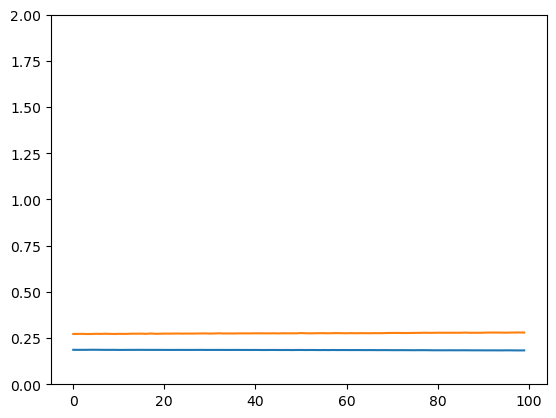

In [135]:
plt.plot(history.history["loss"],)
plt.ylim(0, 2)
plt.plot(history.history["val_loss"])

In [139]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

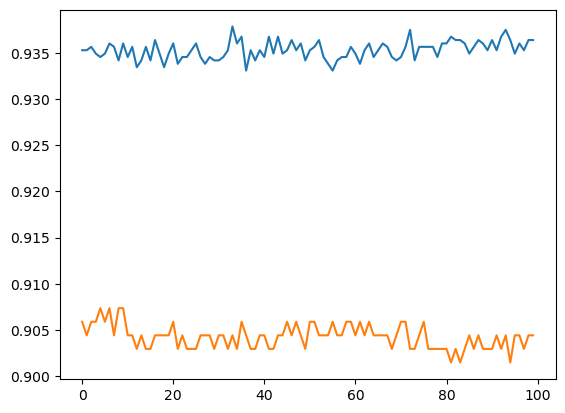

In [141]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
                         